Index number : 190026T

Name         : AHAMED M.I.I

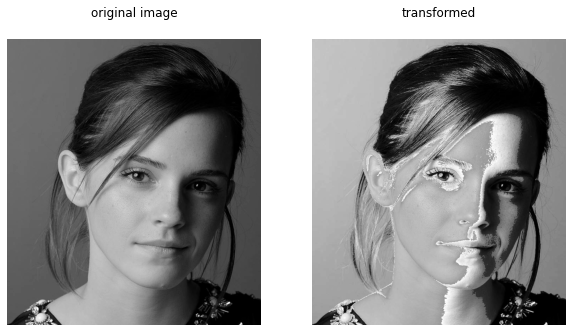

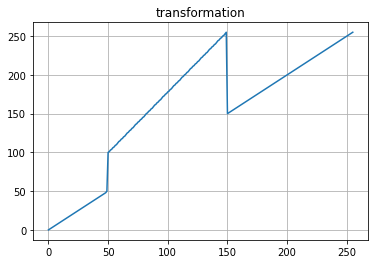

In [1]:
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

emma = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(emma, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('original image')
ax1.xaxis.tick_top()

transformation_1 = np.linspace(0,50,50)
transformation_2 = np.linspace(100,255,100)
transformation_3 = np.linspace(150,255,106)
transformation = np.concatenate([transformation_1, transformation_2, transformation_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(emma, transformation)

ax2.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax2.axis('off')
ax2.title.set_text('transformed')
ax2.xaxis.tick_top()

fig2, ax = plt.subplots()
ax.plot(transformation)
ax.grid()
ax.title.set_text('transformation')

(0.0, 255.0)

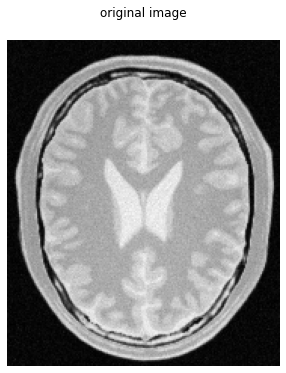

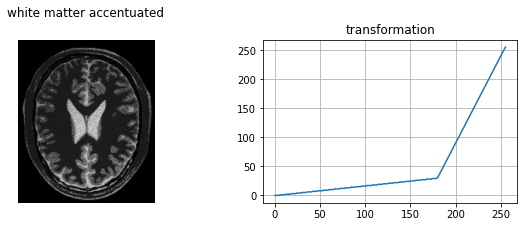

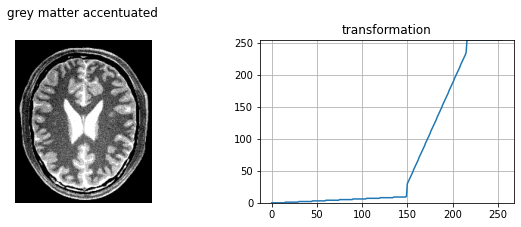

In [103]:
#2)
brain = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

fig1, ax = plt.subplots(figsize=(10,6))
ax.imshow(brain, cmap = 'gray', vmin =0, vmax=255)
ax.axis('off')
ax.title.set_text('original image')
ax.xaxis.tick_top()

#a) accentuate white matter
transformation_1 = np.linspace(0, 30, 180)  
transformation_2 = np.linspace(30, 255, 76)
transformation = np.concatenate([transformation_1, transformation_2], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(brain, transformation)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('white matter accentuated')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.grid()
ax2.title.set_text('transformation')

#b) accentuate grey matter
transformation_1 = np.linspace(0, 10, 150) 
transformation_2 = np.linspace(30, 235 ,66)
transformation_3 = np.linspace(limit2+20,255,40)
transformation = np.concatenate([transformation_1, transformation_2, transformation_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(brain, transformation)

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('grey matter accentuated')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.grid()
ax2.title.set_text('transformation')
ax2.set_ylim([0,255])

(array([1.9810e+03, 0.0000e+00, 1.3000e+01, 0.0000e+00, 9.0000e+00,
        3.7600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2900e+02, 1.6900e+02, 1.4920e+03, 2.1760e+03,
        1.3000e+02, 7.0000e+01, 2.2030e+03, 1.9320e+03, 2.2000e+02,
        7.5660e+03, 1.9470e+03, 1.5840e+03, 4.3600e+02, 4.1030e+03,
        1.8130e+03, 2.0400e+02, 5.9210e+03, 2.0040e+03, 1.5390e+03,
        8.6660e+03, 7.2950e+03, 1.0760e+03, 1.2693e+04, 5.8210e+03,
        8.8000e+03, 6.7070e+03, 2.0591e+04, 1.1696e+04, 1.2825e+04,
        7.1310e+03, 1.7859e+04, 8.0210e+03, 1.3760e+03, 2.5698e+04,
        1.1934e+04, 3.6060e+03, 1.4622e+04, 1.2576e+04, 8.8170e+03,
        8.0960e+03, 9.7210e+03, 1.6667e+04, 1.4923e+04, 1.2325e+04,
        1.1097e+04, 1.2127e+04, 8.3950e+03, 7.7830e+03, 1.0737e+04,
        3.6120e+03, 1.0374e+04, 1.0181e+04, 5.6560e+03, 5.7270e+03,
        7.0380e+03, 1.1090e+04, 6.3930e+03, 8.97

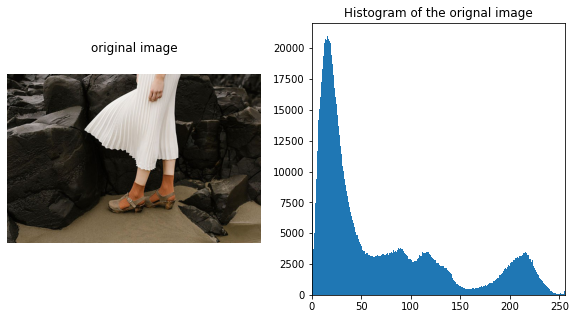

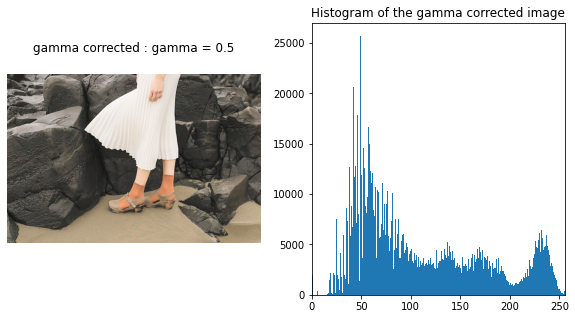

In [100]:
#3)
original = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert original is not None
original_lab = cv.cvtColor(original, cv.COLOR_BGR2LAB)
L = original_lab[:,:,0]

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
ax1.imshow(original_rgb)
ax1.axis('off')
ax1.title.set_text('original image')
ax1.xaxis.tick_top()

ax2.set_xlim([0, 256])
ax2.title.set_text('Histogram of the orignal image')
ax2.hist(original_rgb.flatten(), 256, [0, 256])

gamma = 0.5
correction = np.array([(pixel/255)**gamma*255 for pixel in range(0, 256)]).astype(np.uint8)
corrected = cv.LUT(L, correction)
original_lab[:,:,0] = corrected
corrected_rgb = cv.cvtColor(original_lab, cv.COLOR_LAB2RGB)

fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(corrected_rgb)
ax1.axis('off')
ax1.title.set_text('gamma corrected : gamma = '+ str(gamma))
ax1.xaxis.tick_top()

ax2.set_xlim([0, 256])
ax2.title.set_text('Histogram of the gamma corrected image')
ax2.hist(corrected_rgb.flatten(), 256, [0, 256])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8320e+04, 0.0000e+00,
        1.7500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4410e+03, 1.6420e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6457e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0381e+04,
        0.0000e+00, 0.0000e+00, 2.9450e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1490e+03, 1.0380e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

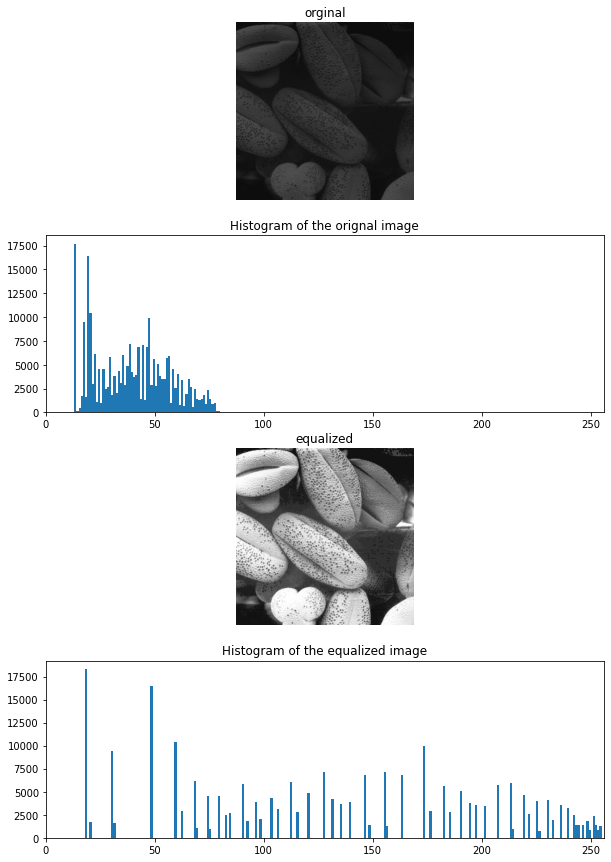

In [97]:
#4)
def histogramEqualization(image):
    hist ,bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf*(len(hist)-1)/cdf.max()
    transformation = cdf_normalized.astype(int)
    equalized = cv.LUT(image, transformation)
    return equalized
    
shells = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\shells.png', cv.IMREAD_GRAYSCALE)
assert shells is not None

equalized = histogramEqualization(shells)

fig, ax = plt.subplots(4, figsize=(10,15))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(shells, cmap = 'gray', vmin =0, vmax=255)

ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the orignal image')
ax[1].hist(shells.flatten(), 256, [0, 256])

ax[2].axis('off')
ax[2].title.set_text('equalized')
ax[2].imshow(equalized, cmap = 'gray', vmin =0, vmax=255)

ax[3].set_xlim([0, 256])
ax[3].title.set_text('Histogram of the equalized image')
ax[3].hist(equalized.flatten(), 256, [0, 256])


In [ ]:
#5)

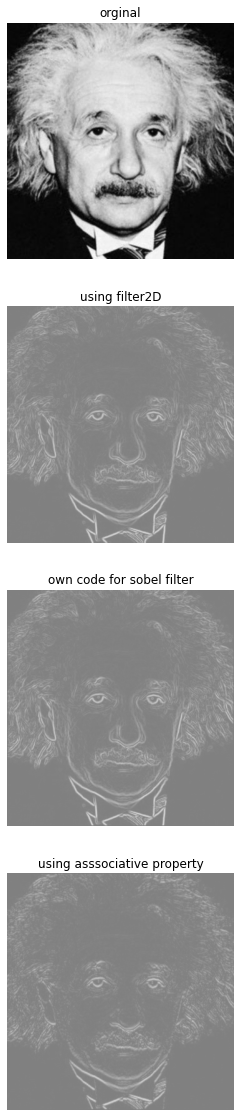

In [95]:
#6)
import math

einstein = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert shells is not None

fig, ax = plt.subplots(4, figsize=(20,20))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(einstein, cmap = 'gray', vmin =0, vmax=255)

#a)
kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
image_y = cv.filter2D(einstein, -1, kernel_y)

kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
image_x = cv.filter2D(einstein, -1, kernel_x)

grad_mag = np.sqrt(image_y**2 + image_x**2)

ax[1].axis('off')
ax[1].title.set_text('using filter2D')
ax[1].imshow(grad_mag, cmap = 'gray', vmin =-1020, vmax=1020)

#b)
def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    k_h, k_w = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = image.astype('float')
    result = np.zeros(image.shape, 'float')

    for m in range(k_h, h - k_h):
        for n in range(k_w , w - k_w):
            result[m, n] = np.dot(image_float[m - k_h : m + k_h + 1 , n - k_w : n+ k_w + 1].flatten(), kernel.flatten())

    return result

image_y1 = filter(einstein, kernel_y)
image_x1 = filter(einstein, kernel_x)
grad_mag1 = np.sqrt(image_y1**2 + image_x1**2)

ax[2].axis('off')
ax[2].title.set_text('own code for sobel filter')
ax[2].imshow(grad_mag1, cmap = 'gray', vmin =-1020, vmax=1020)

#c)
kernel_y1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [2], [1]], dtype = np.float32)
image_y2 = cv.filter2D(einstein, -1, kernel_y1)
image_y2 = cv.filter2D(image_y2, -1, kernel_y2)

kernel_x1 = np.array([-1, -2, -1], dtype = np.float32)
kernel_x2 = np.array([[1], [0], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(einstein, -1, kernel_x1)
image_x2 = cv.filter2D(image_x2, -1, kernel_x2)

grad_mag2 = np.sqrt(image_y2**2 + image_x2**2)

ax[3].axis('off')
ax[3].title.set_text('using asssociative property')
ax[3].imshow(grad_mag2, cmap = 'gray', vmin =-1020, vmax=1020)

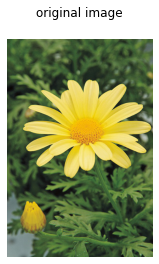

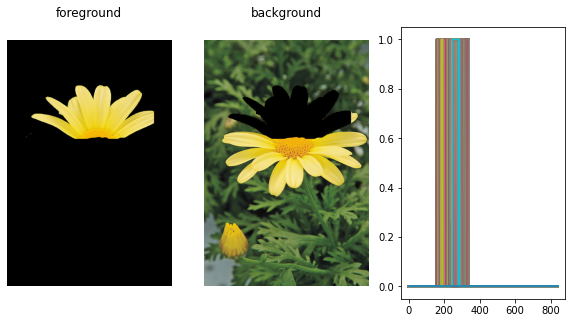

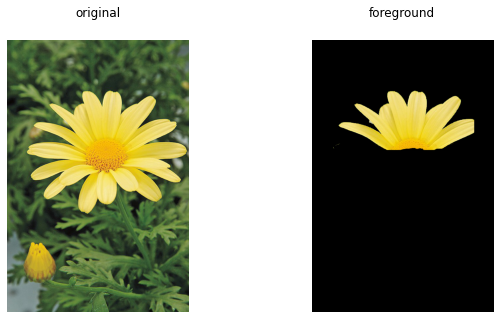

In [93]:
#7)
daisy = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\daisy.jpg', cv.IMREAD_COLOR)
assert daisy is not None
daisy_rgb = cv.cvtColor(daisy, cv.COLOR_BGR2RGB)

fig1, ax = plt.subplots()
ax.imshow(daisy_rgb)
ax.title.set_text('original image')
ax.axis('off')
ax.xaxis.tick_top()

#a)
mask = np.zeros(daisy_rgb.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(daisy_rgb,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = daisy_rgb*mask2[:,:,np.newaxis]
back = daisy_rgb - fore

fig2, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
ax1.imshow(fore)
ax1.title.set_text('foreground')
ax1.axis('off')
ax1.xaxis.tick_top()

ax2.imshow(back)
ax2.title.set_text('background')
ax2.axis('off')
ax2.xaxis.tick_top()

ax3.plot(mask2)
plt.show()


#b)
fig3, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(daisy_rgb)
ax1.title.set_text('original')
ax1.axis('off')
ax1.xaxis.tick_top()



ax2.imshow(fore)
ax2.title.set_text('foreground')
ax2.axis('off')
ax2.xaxis.tick_top()

7)
c)